# Credit Risk Analysis Notebook
## Introduction

This notebook explores a publicly available Credit Risk Dataset, focusing on predicting the likelihood of loan default based on borrower information and loan characteristics. Credit risk prediction is a critical task in the financial sector, as it allows lenders to assess the probability of default and make informed lending decisions.

The dataset contains various features describing the borrower's demographic, financial, and credit-related attributes, as well as the status of their loans. The goal of this notebook is to analyze the data, build predictive models, and evaluate their performance in classifying loan status.
Variable Descriptions

Below is a detailed description of the variables in the dataset:

    Variable Name	             Description
    
    person_age	                 Age of the borrower in years.
    person_income	             Annual income of the borrower (in dollars).
    person_home_ownership        Type of home ownership, e.g., RENT, OWN, or MORTGAGE.
    person_emp_length	         Employment length of the borrower (in years).
    loan_intent	                 Purpose of the loan, e.g., PERSONAL, EDUCATION, MEDICAL, etc.
    loan_grade	                 Credit grade of the loan, typically assigned by a lender, e.g., A, B, C.
    loan_amnt	                 Amount of the loan requested (in dollars).
    loan_int_rate	             Interest rate for the loan (as a percentage).
    loan_status	                 Target variable: indicates whether the borrower defaulted (1) or not (0).
    loan_percent_income	         Ratio of the loan amount to the borrower's annual income.
    cb_person_default_on_file	 Whether the borrower has a default on file, encoded as Y (Yes) or N (No).
    cb_person_cred_hist_length	 Length of the borrower’s credit history (in years).

## Objectives

#### Exploratory Data Analysis (EDA):

Investigate the distributions of the variables.
Explore relationships between features and the target variable (loan_status).
Analyze trends in credit risk across different groups, such as age groups, income levels, and loan intents.

#### Feature Engineering:

Create new features, such as categorical groupings for age, income, and loan amounts, to get better understanding of the relationship between the target variable and the predictors.

#### Model Development:

Develop and compare machine learning models (e.g., Logistic Regression, XGBoost) for credit risk prediction.
Address class imbalance using techniques like weighting or oversampling.

#### Model Evaluation:

Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and AUC-ROC.
Visualize confusion matrices and ROC curves.

#### Insights and Recommendations:

Summarize key findings from the analysis.
Provide actionable insights to lenders on identifying high-risk borrowers.

## Dataset Source

The dataset used in this analysis is publicly available on Kaggle.

## Exploratory data analysis

In [290]:
import warnings
warnings.filterwarnings("ignore")

In [280]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [72]:
data = pd.read_csv("credit_risk_dataset.csv")

In [74]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [113]:
data['loan_status'].value_counts() ## checking for imbalances between classes

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [76]:
data.isnull().sum() ## checking for missing values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [78]:
## filling missing values with zeros where there is no evidence of job history
data['person_emp_length'] = data['person_emp_length'].fillna(0)  

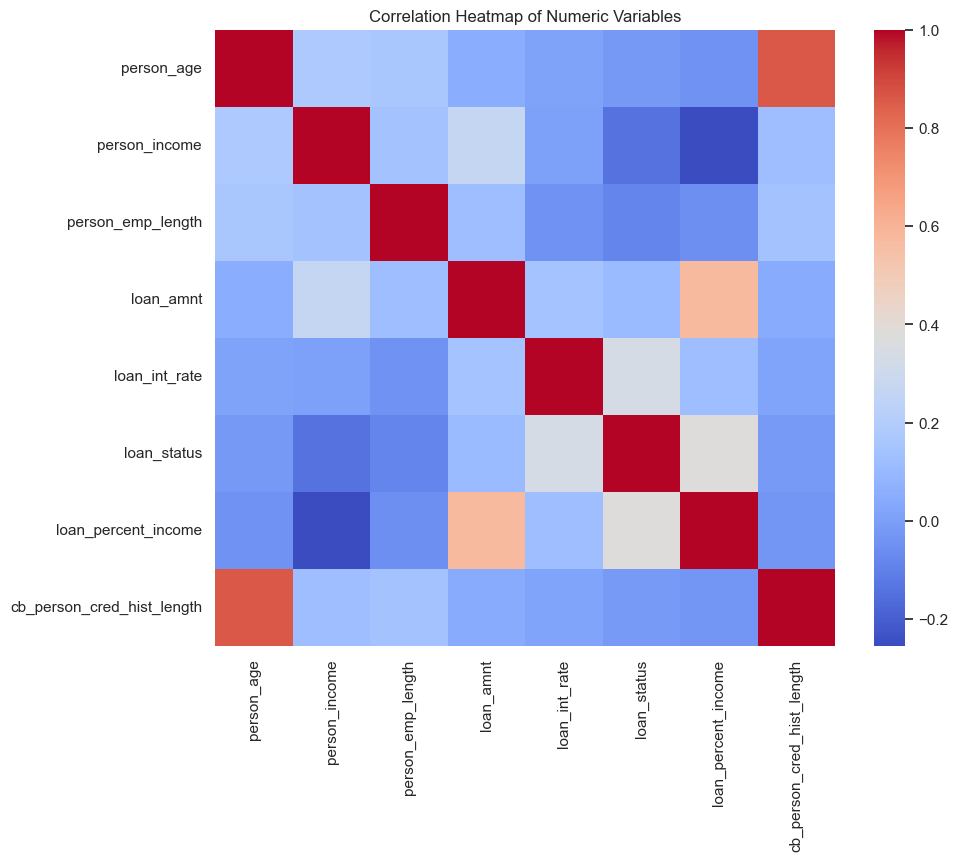

In [100]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


There is a strong correlation between 'person_age' and 'cb_person_cred_hist_length', which makes sense because younger individuals tend to have shorter credit histories. This relationship is proportional to age.

### # Plot the relationship between target variable and predictors

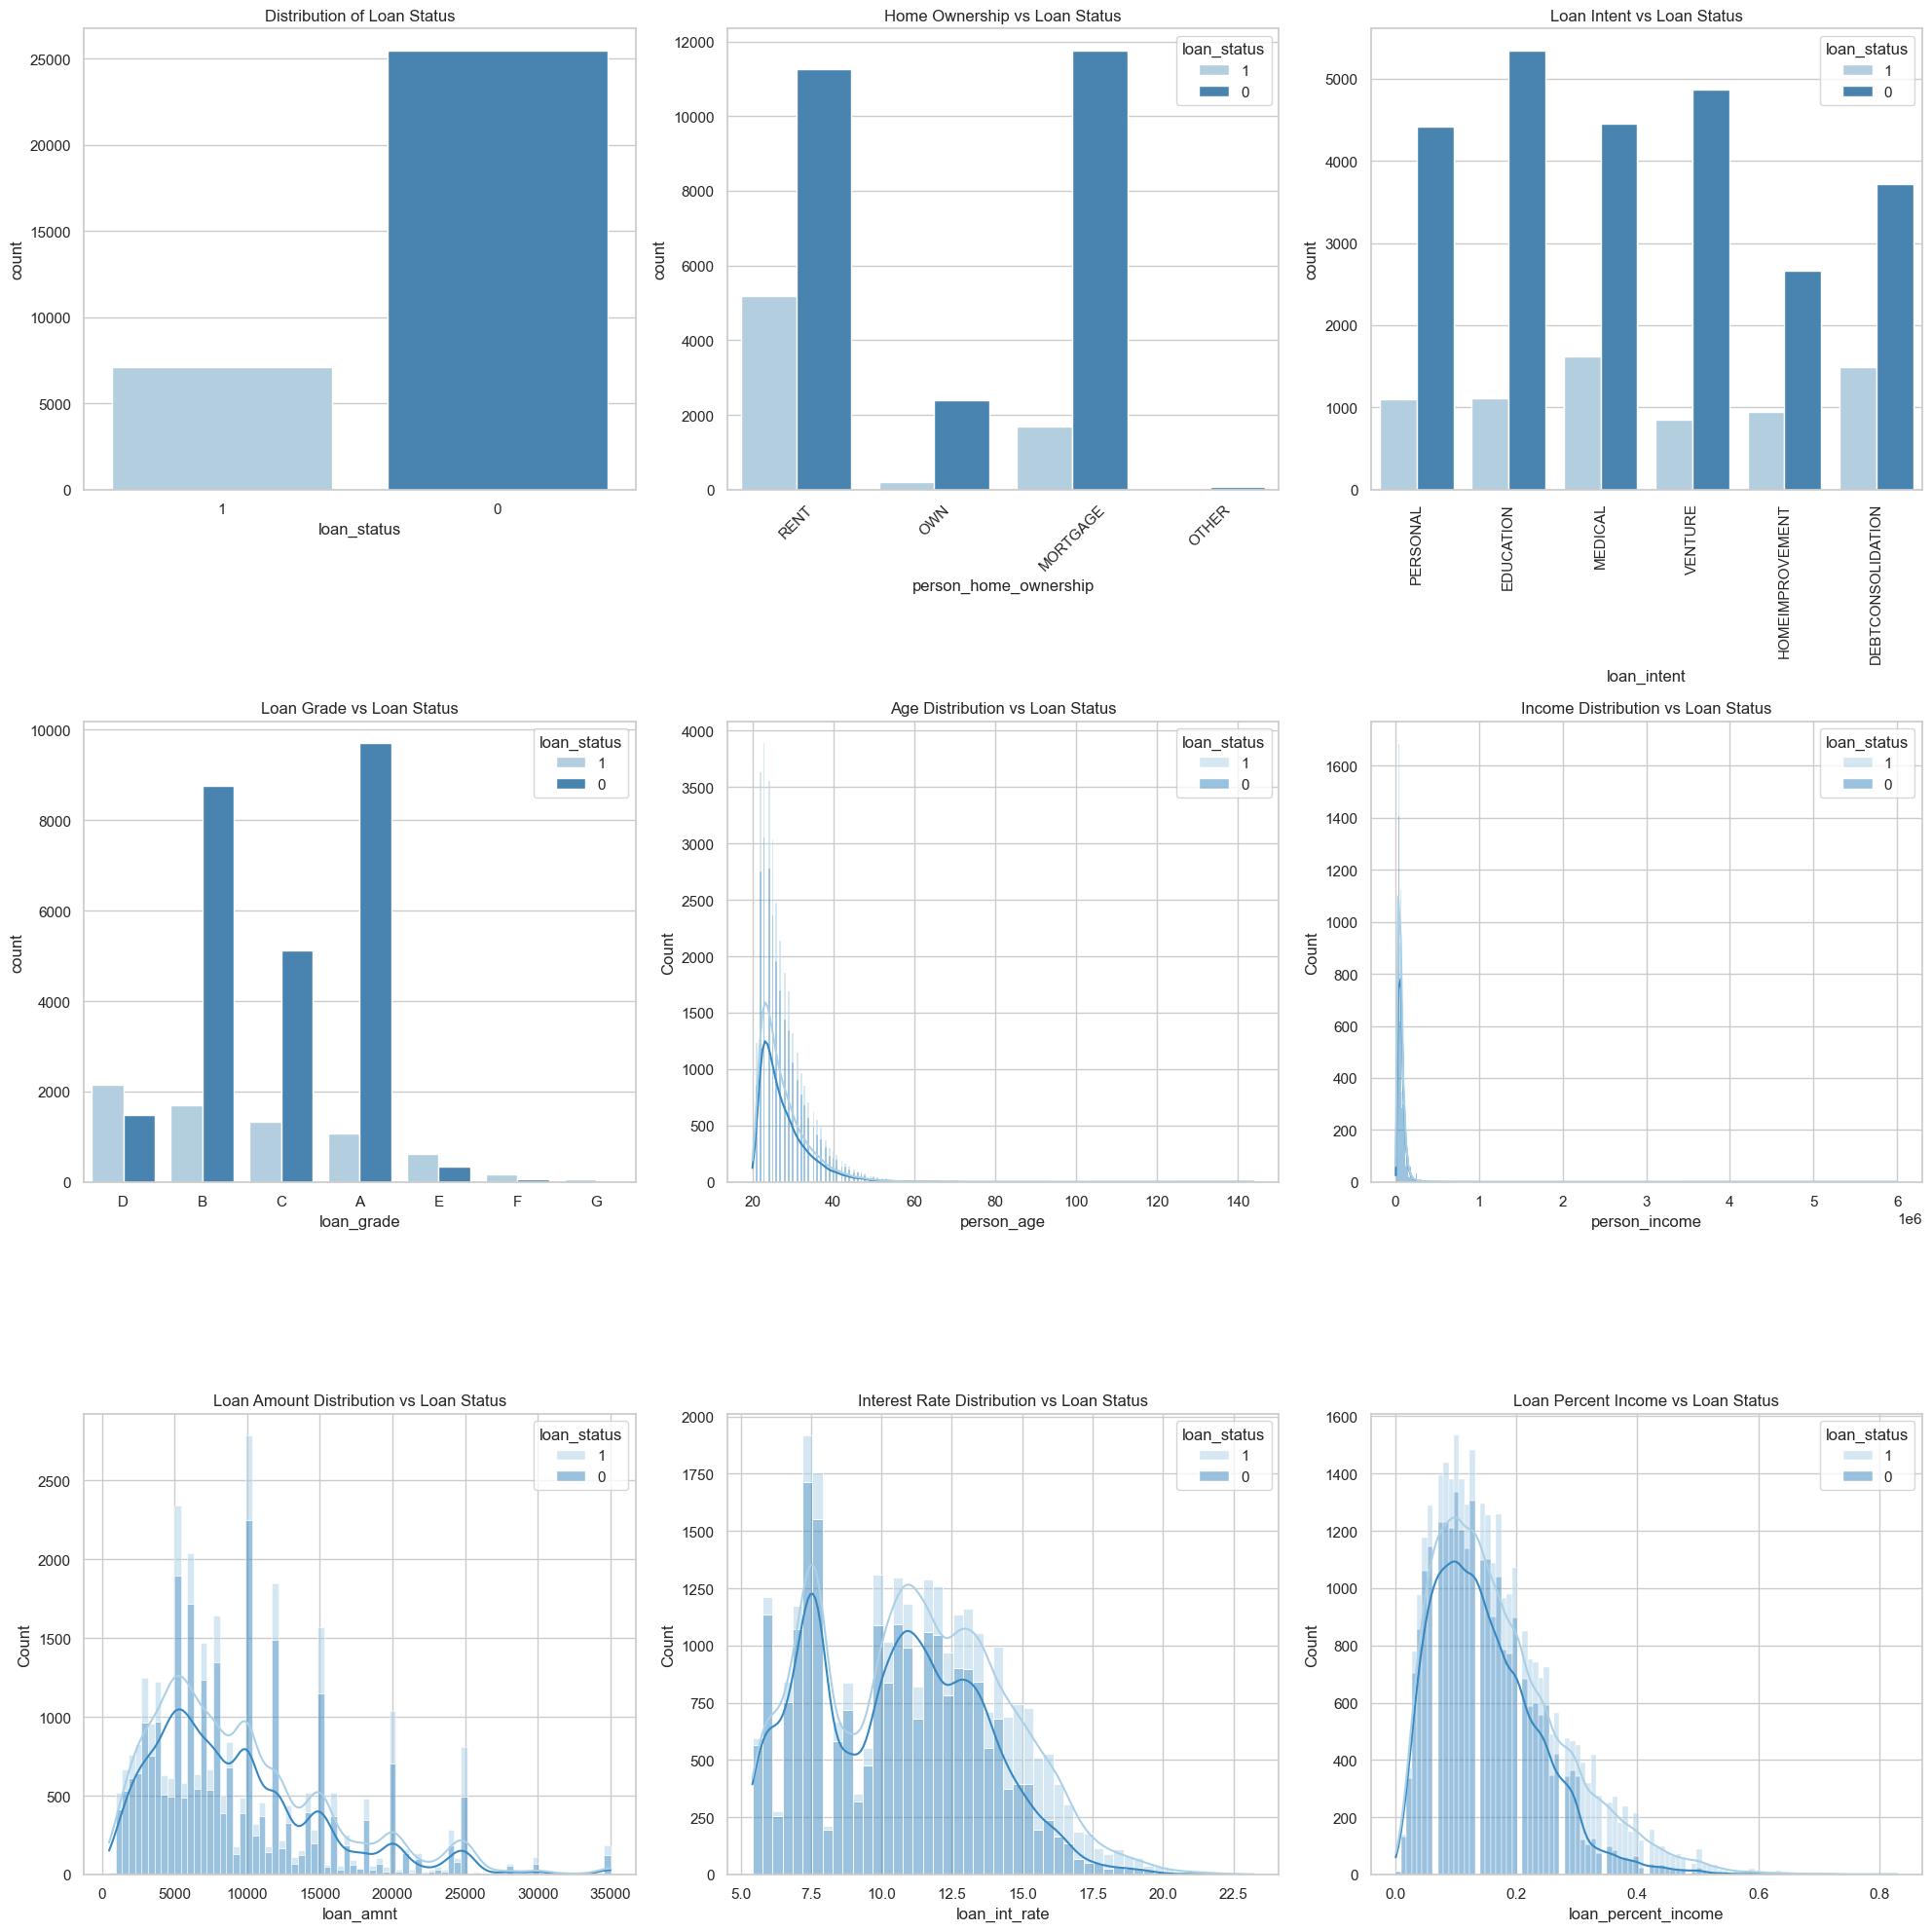

In [115]:

data['loan_status'] = data['loan_status'].astype(str)
data['loan_intent'] = data['loan_intent'].astype(str)

# Set style for better visualization
sns.set(style="whitegrid")

# Create a figure for plotting
plt.figure(figsize=(20, 20))

# 1. Distribution of loan status (Dependent variable)
plt.subplot(3, 3, 1)
sns.countplot(x='loan_status', data=data, palette='Blues')
plt.title('Distribution of Loan Status')
plt.xticks(rotation=0)  # Rotate x-axis labels

# 2. Bar plot for 'person_home_ownership' vs Loan Status
plt.subplot(3, 3, 2)
sns.countplot(x='person_home_ownership', hue='loan_status', data=data, palette='Blues')
plt.title('Home Ownership vs Loan Status')
plt.xticks(rotation=45)  # Rotate x-axis labels

# 3. Bar plot for 'loan_intent' vs Loan Status
plt.subplot(3, 3, 3)
sns.countplot(x='loan_intent', hue='loan_status', data=data, palette='Blues')
plt.title('Loan Intent vs Loan Status')
plt.xticks(rotation=90)  # Rotate x-axis labels

# 4. Bar plot for 'loan_grade' vs Loan Status
plt.subplot(3, 3, 4)
sns.countplot(x='loan_grade', hue='loan_status', data=data, palette='Blues')
plt.title('Loan Grade vs Loan Status')
plt.xticks(rotation=0)  # Rotate x-axis labels

# 5. Numerical variable: 'person_age' vs Loan Status
plt.subplot(3, 3, 5)
sns.histplot(data=data, x='person_age', hue='loan_status', kde=True, palette='Blues', multiple='stack')
plt.title('Age Distribution vs Loan Status')

# 6. Numerical variable: 'person_income' vs Loan Status
plt.subplot(3, 3, 6)
sns.histplot(data=data, x='person_income', hue='loan_status', kde=True, palette='Blues', multiple='stack')
plt.title('Income Distribution vs Loan Status')

# 7. Numerical variable: 'loan_amnt' vs Loan Status
plt.subplot(3, 3, 7)
sns.histplot(data=data, x='loan_amnt', hue='loan_status', kde=True, palette='Blues', multiple='stack')
plt.title('Loan Amount Distribution vs Loan Status')

# 8. Numerical variable: 'loan_int_rate' vs Loan Status
plt.subplot(3, 3, 8)
sns.histplot(data=data, x='loan_int_rate', hue='loan_status', kde=True, palette='Blues', multiple='stack')
plt.title('Interest Rate Distribution vs Loan Status')

# 9. Numerical variable: 'loan_percent_income' vs Loan Status
plt.subplot(3, 3, 9)
sns.histplot(data=data, x='loan_percent_income', hue='loan_status', kde=True, palette='Blues', multiple='stack')
plt.title('Loan Percent Income vs Loan Status')

# Adjust layout
plt.tight_layout()
plt.show()


We can observe some outlayers in person_age and person_income

In [16]:
data['person_age'].value_counts()

person_age
23     3889
22     3633
24     3549
25     3037
26     2477
27     2138
28     1854
29     1687
30     1316
21     1229
31     1142
32      964
33      856
34      709
35      620
36      548
37      478
38      373
39      302
40      271
41      241
42      188
43      164
44      141
45      108
46       94
47       94
48       75
50       52
49       49
51       39
52       36
53       30
54       24
55       20
58       19
56       15
57       15
20       15
60       15
65        9
66        9
61        9
70        7
64        7
62        7
59        5
69        5
144       3
73        3
63        3
123       2
78        1
94        1
80        1
84        1
76        1
67        1
Name: count, dtype: int64

In [118]:
data = data[data['person_age']<100] ## Cleaning the data, age abouve 100 is not very realistic

In [120]:
data['person_age'].max()

94

In [165]:
data['person_income'].max(), data['person_income'].min() ## checking the max, min income

(2039784, 4000)

In [24]:
data[data['person_income']==2039784]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.0,Y,15


In [131]:
data[data['person_income']>1000000] ## a small group of rich people

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
17833,32,1200000,MORTGAGE,1.0,VENTURE,A,12000,7.51,0,0.01,N,8
29119,36,1200000,OWN,16.0,MEDICAL,A,10000,6.54,0,0.01,N,11
29120,40,1200000,MORTGAGE,1.0,MEDICAL,A,10000,NaN,0,0.01,N,16
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.00,Y,15
31922,47,1362000,MORTGAGE,9.0,VENTURE,A,6600,7.74,0,0.00,N,17
31924,44,1440000,MORTGAGE,7.0,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15
32497,63,1782000,RENT,13.0,EDUCATION,C,12025,14.27,0,0.01,N,30
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,NaN,0,0.00,N,21


In [36]:
data['cb_person_default_on_file'].value_counts() ## checking for entities that have previous default loan status

cb_person_default_on_file
N    26831
Y     5745
Name: count, dtype: int64

In [122]:
data.groupby('loan_status')['cb_person_default_on_file'].value_counts().to_frame().reset_index()

,loan_status,cb_person_default_on_file,count
0,0,N,21895
1,0,Y,3573
2,1,N,4936
3,1,Y,2172



A substantial number of borrowers without a default on file (N) have also not defaulted on their loans, which could indicate low credit risk.
A smaller number of borrowers who have a default on file have defaulted on their loan (Row 3). This suggests that while having a default on file might increase the likelihood of loan default, it’s not a definitive indicator.
The presence of borrowers without default on file but still having a loan default (Row 2) may suggest other factors beyond credit history that influence loan repayment. 
Row 1 shows that there are individuals who have a default on file but have not defaulted on their current loan. This suggests that some borrowers with a past default have since recovered and are now meeting their financial obligations, which might indicate improved financial management or changes in their financial circumstances.

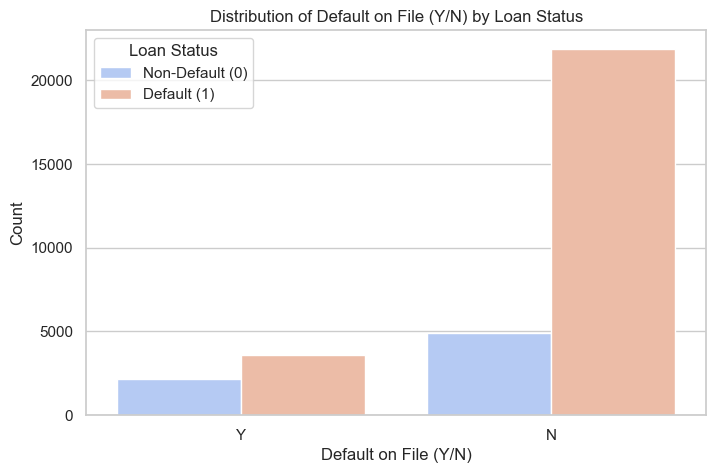

In [125]:
# Create the plot
plt.figure(figsize=(8, 5))
sns.countplot(
    x=data['cb_person_default_on_file'], 
    hue=data['loan_status'], 
    palette='coolwarm'
)
plt.title('Distribution of Default on File (Y/N) by Loan Status')
plt.xlabel('Default on File (Y/N)')
plt.ylabel('Count')
plt.legend(title='Loan Status', labels=['Non-Default (0)', 'Default (1)'])
plt.show()


## Feature ingineering

In [191]:
age_group = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66,95],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65','66-95']).astype('category')

income_group = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, 250000],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high']).astype('category')

loan_amount_group = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large']).astype('category')


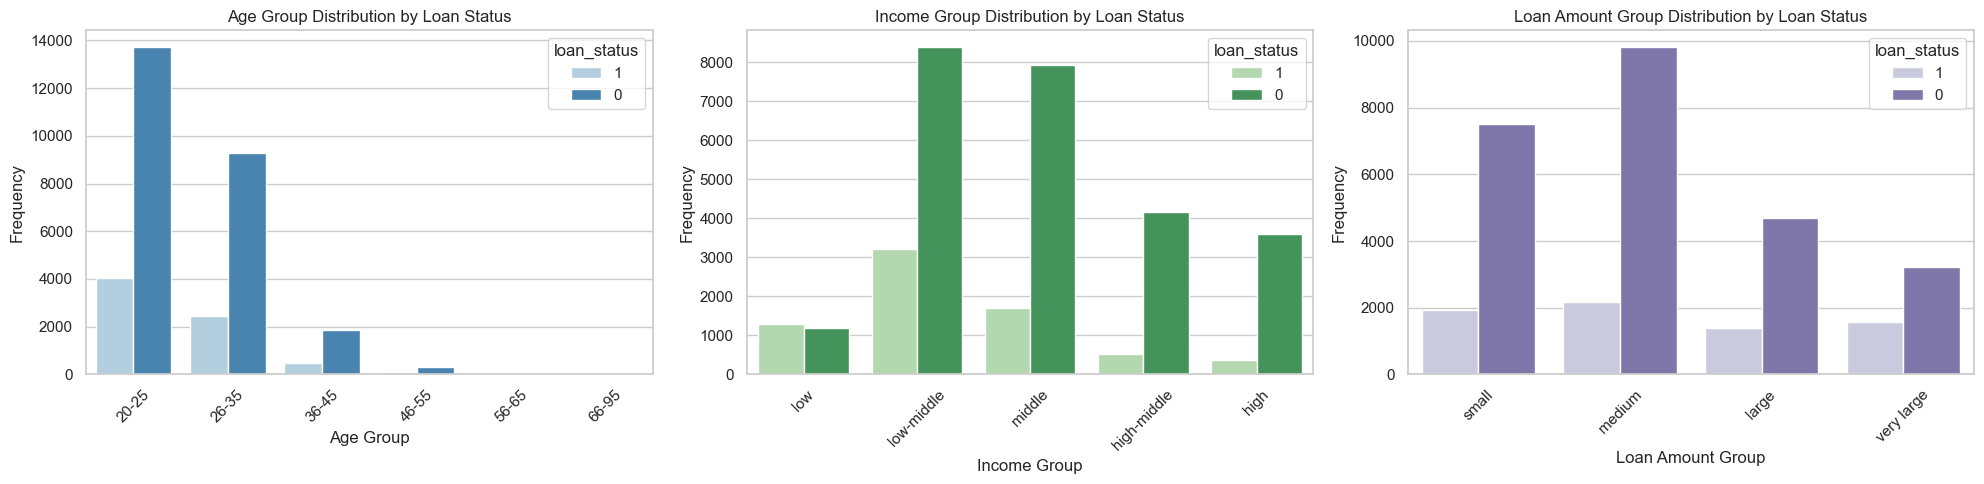

In [187]:
# Combine variables into a single DataFrame
data_separate = pd.DataFrame({
    'age_group': age_group,
    'income_group': income_group,
    'loan_amount_group': loan_amount_group,
    'loan_status': data['loan_status']
})

data_separate = data_separate.dropna()
data_separate['loan_status'] = data_separate['loan_status'].astype(str)



# Set Seaborn style for better visualization
sns.set(style="whitegrid")

# Plot distributions with respect to loan_status
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=False)

# Age group vs Loan status
sns.countplot(
    x='age_group', hue='loan_status', data=data_separate, ax=axes[0], palette='Blues'
)
axes[0].set_title('Age Group Distribution by Loan Status')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Income group vs Loan status
sns.countplot(
    x='income_group', hue='loan_status', data=data_separate, ax=axes[1], palette='Greens'
)
axes[1].set_title('Income Group Distribution by Loan Status')
axes[1].set_xlabel('Income Group')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Loan amount group vs Loan status
sns.countplot(
    x='loan_amount_group', hue='loan_status', data=data_separate, ax=axes[2], palette='Purples'
)
axes[2].set_title('Loan Amount Group Distribution by Loan Status')
axes[2].set_xlabel('Loan Amount Group')
axes[2].set_ylabel('Frequency')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

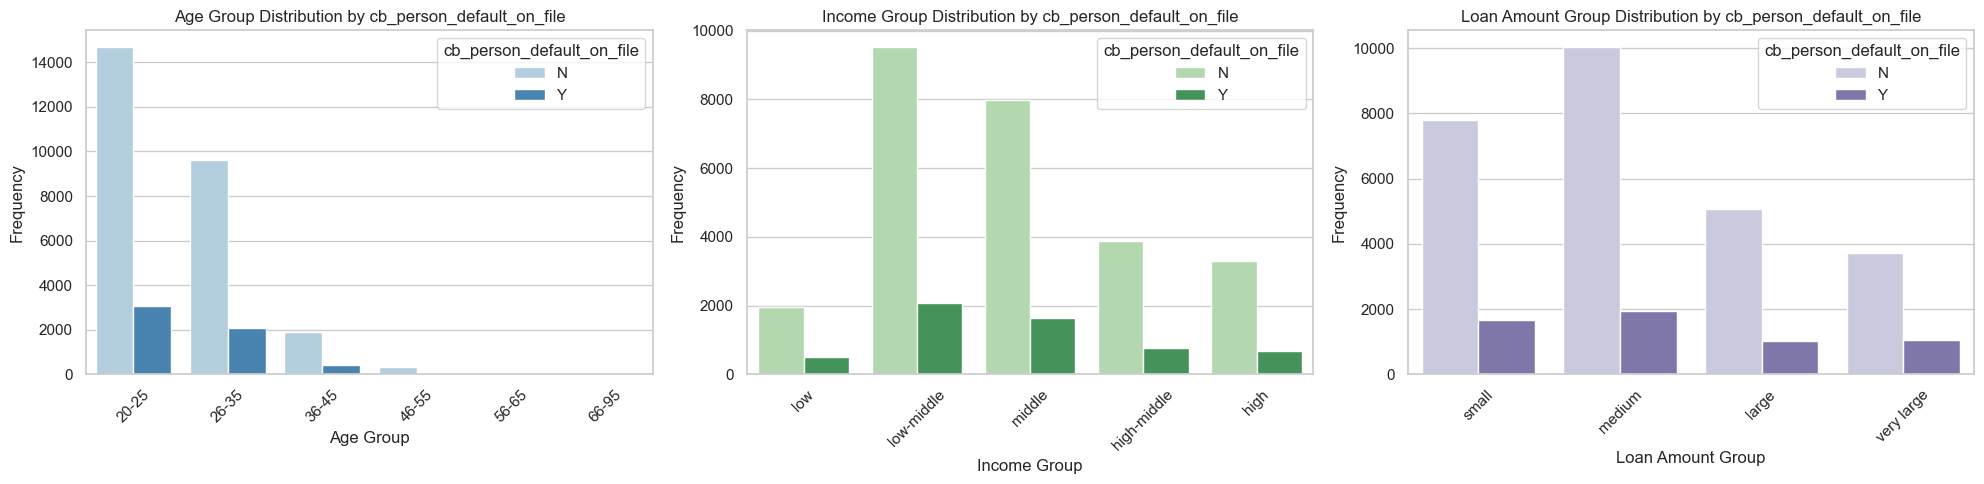

In [189]:
# Combine variables into a single DataFrame
data_separate = pd.DataFrame({
    'age_group': age_group,
    'income_group': income_group,
    'loan_amount_group': loan_amount_group,
    'cb_person_default_on_file': data['cb_person_default_on_file']
})
data_separate = data_separate.dropna()
data_separate['cb_person_default_on_file'] = data_separate['cb_person_default_on_file'].astype(str).astype('category')


# Set Seaborn style for better visualization
sns.set(style="whitegrid")

# Plot distributions with respect to loan_status
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=False)

# Age group vs Loan status
sns.countplot(
    x='age_group', hue='cb_person_default_on_file', data=data_separate, ax=axes[0], palette='Blues'
)
axes[0].set_title('Age Group Distribution by cb_person_default_on_file')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Income group vs Loan status
sns.countplot(
    x='income_group', hue='cb_person_default_on_file', data=data_separate, ax=axes[1], palette='Greens'
)
axes[1].set_title('Income Group Distribution by cb_person_default_on_file')
axes[1].set_xlabel('Income Group')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)

# Loan amount group vs Loan status
sns.countplot(
    x='loan_amount_group', hue='cb_person_default_on_file', data=data_separate, ax=axes[2], palette='Purples'
)
axes[2].set_title('Loan Amount Group Distribution by cb_person_default_on_file')
axes[2].set_xlabel('Loan Amount Group')
axes[2].set_ylabel('Frequency')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

## Model Development

### Preprocessing the data

In [264]:

# Encode categorical variables
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Check and encode categorical variables
for col in categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col].astype(str))

# Handle missing values
imputer = SimpleImputer(strategy="median")
data.iloc[:, :] = imputer.fit_transform(data)

# Ensure 'loan_status' is properly encoded 
data['loan_status'] = LabelEncoder().fit_transform(data['loan_status'].astype(str))

# Define features and target
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Logistic regression

Logistic Regression is a statistical model used for binary classification tasks, where the goal is to predict one of two possible outcomes. It models the relationship between a set of input features and the probability of a certain class using the logistic function (sigmoid function), which maps any input to a value between 0 and 1. The model estimates the parameters (coefficients) through maximum likelihood estimation, aiming to minimize the error in predicting the target variable. Logistic Regression can be extended to multiclass classification and regularized to avoid overfitting using L1 (Lasso) or L2 (Ridge) penalties. It is simple, interpretable, and widely used for tasks such as binary classification.

In [327]:
# Logistic Regression with class_weight="balanced"
lr = LogisticRegression(class_weight="balanced")
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]


### XGBoost

XGBoost (Extreme Gradient Boosting) is an optimized, scalable machine learning library based on gradient boosting techniques, which build an ensemble of decision trees to make predictions. It is highly efficient, capable of handling large datasets, and designed to improve performance through parallelization, regularization (L1 and L2), and handling of missing values. XGBoost has several hyperparameters, including tree depth, learning rate, and the number of boosting rounds, that control model complexity and prevent overfitting. It is widely used in machine learning competitions and practical applications due to its accuracy and speed.

In [329]:
# Calculate the scale_pos_weight parameter
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Train XGBoost model with scale_pos_weight to handle class imbalance
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    max_depth=6,
    eta=0.3,
    scale_pos_weight=scale_pos_weight
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


## Models evaluation

### Logistic regression

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      5094
           1       0.49      0.77      0.60      1422

    accuracy                           0.77      6516
   macro avg       0.71      0.77      0.72      6516
weighted avg       0.83      0.77      0.79      6516

AUC-ROC: 0.8464258715335932


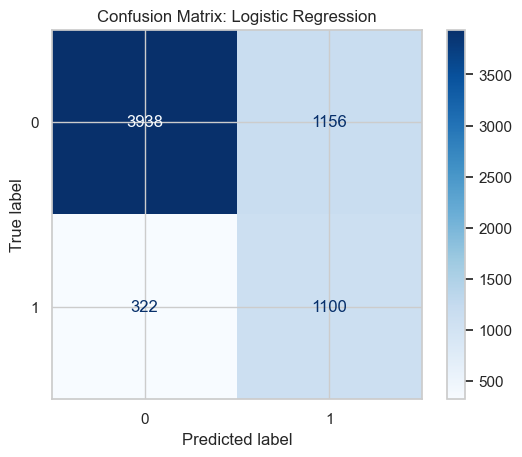

In [333]:
# Evaluate Logistic Regression
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['0', '1'])
disp_lr.plot(cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

### xgboost


XGBoost Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5094
           1       0.83      0.80      0.82      1422

    accuracy                           0.92      6516
   macro avg       0.89      0.88      0.88      6516
weighted avg       0.92      0.92      0.92      6516

AUC-ROC: 0.9464257610923086


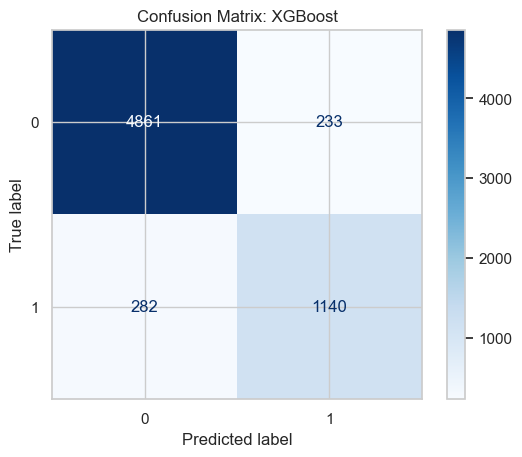

In [336]:
# Evaluate XGBoost
print("\nXGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['0', '1'])
disp_xgb.plot(cmap='Blues')
plt.title('Confusion Matrix: XGBoost')
plt.show()


### Compare the ROC curves

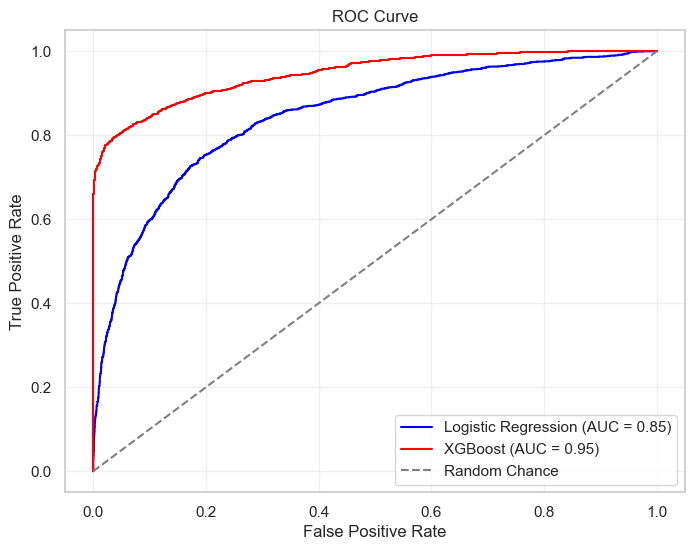

In [339]:
# Plot ROC Curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


### Feature imortance score for xgboost

In [341]:
# Get feature importance scores
feature_importance = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)


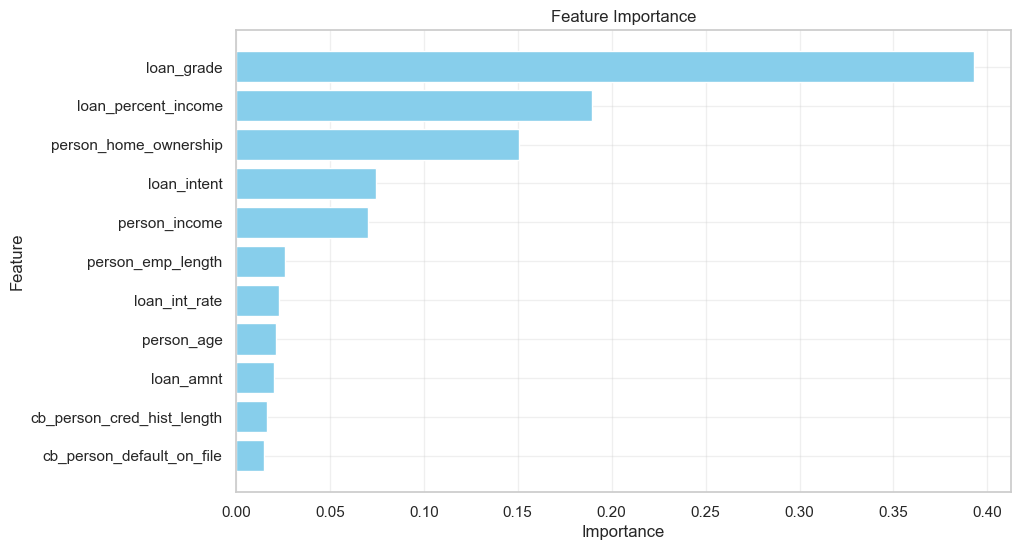

In [343]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.grid(alpha=0.3)
plt.show()


## Conclusion


In conclusion, two models were compared for predicting loan default: Logistic Regression and XGBoost. XGBoost demonstrated better performance, which is understandable given its ability to handle complex relationships and interactions between features. The most important predictor for loan default was found to be "loan_grade," a complex and pre-calculated variable that reflects the creditworthiness of the loan. Additionally, while the "cb_person_default_on_file" variable (indicating previous credit defaults) proved to be a helpful indicator in assessing credit risk, it is not a perfect predictor. There are a small number of cases where individuals with a prior default on file were able to recover and have a good loan status, demonstrating that credit risk is not solely determined by past defaults.
Additionally, individuals with no history of credit defaults can still end up defaulting on a loan. This highlights the complexity of credit risk assessment, as it is influenced by various factors beyond just past credit behavior. While a clean credit history is an important factor in predicting loan repayment, other variables, such as income level, loan grade, and employment status, also play significant roles in determining a borrower's likelihood of default. Therefore, even individuals without a prior default may still pose a risk, underscoring the need for a holistic approach to credit risk evaluation.